In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-4186b6c3-08bd-cbb2-1df3-bc13ffe837fc)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf 
import numpy as np
import pathlib
import cv2
import os
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score,f1_score
from sklearn.preprocessing import OneHotEncoder,LabelEncoder


%matplotlib inline

In [ ]:
dataset_dir = "drive/MyDrive/Dataset/shoe_sandle_boot/"

In [ ]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
train_data_dir = pathlib.Path(dataset_dir) # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in train_data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['Boot' 'Sandal' 'Shoe']


In [ ]:

img_size = 244

def get_image_from_directory(data_dir):
    image_bgr = []
    label = []
    count = 500
    for file in data_dir.glob("*"):
        for i, image in enumerate(file.glob("*")):
            print(image)
            if re.search(r"(Shoe)",str(image)):
                _image = cv2.imread(str(image))
                if not _image is None and  i < count: # check to see image is not empty
                    label.append("Shoe")
                    resize_image = cv2.resize(_image, (img_size, img_size),interpolation = cv2.INTER_NEAREST)
                    image_bgr.append(resize_image)
            elif re.search(r"Sandal",str(image)):
                _image = cv2.imread(str(image))
                if not _image is None and i < count: # check to see image is not empty
                    label.append("Sandal")
                    resize_image = cv2.resize(_image, (img_size, img_size),interpolation = cv2.INTER_NEAREST)
                    image_bgr.append(resize_image)
            elif re.search(r"Boot",str(image)):
                _image = cv2.imread(str(image))
                if not _image is None and i < count: # check to see image is not empty
                    label.append("Boot")
                    resize_image = cv2.resize(_image, (img_size, img_size),interpolation = cv2.INTER_NEAREST)
                    image_bgr.append(resize_image)
    return image_bgr,label

In [ ]:
data_image_bgr,data_label = get_image_from_directory(train_data_dir)


Streaming output truncated to the last 5000 lines.
drive/MyDrive/Dataset/shoe_sandle_boot/Sandal/Sandal (4636).jpg
drive/MyDrive/Dataset/shoe_sandle_boot/Sandal/Sandal (4639).jpg
drive/MyDrive/Dataset/shoe_sandle_boot/Sandal/Sandal (4642).jpg
drive/MyDrive/Dataset/shoe_sandle_boot/Sandal/Sandal (4619).jpg
drive/MyDrive/Dataset/shoe_sandle_boot/Sandal/Sandal (4656).jpg
drive/MyDrive/Dataset/shoe_sandle_boot/Sandal/Sandal (4655).jpg
drive/MyDrive/Dataset/shoe_sandle_boot/Sandal/Sandal (4622).jpg
drive/MyDrive/Dataset/shoe_sandle_boot/Sandal/Sandal (4643).jpg
drive/MyDrive/Dataset/shoe_sandle_boot/Sandal/Sandal (4653).jpg
drive/MyDrive/Dataset/shoe_sandle_boot/Sandal/Sandal (4641).jpg
drive/MyDrive/Dataset/shoe_sandle_boot/Sandal/Sandal (463).jpg
drive/MyDrive/Dataset/shoe_sandle_boot/Sandal/Sandal (4640).jpg
drive/MyDrive/Dataset/shoe_sandle_boot/Sandal/Sandal (4626).jpg
drive/MyDrive/Dataset/shoe_sandle_boot/Sandal/Sandal (4646).jpg
drive/MyDrive/Dataset/shoe_sandle_boot/Sandal/Sandal (

In [ ]:
np.unique(data_label)

array(['Boot', 'Sandal', 'Shoe'], dtype='<U6')

In [ ]:
len(data_image_bgr),len(data_label)

(1500, 1500)

In [ ]:
train_image_bgr,test_image_bgr,y_train,y_test = train_test_split(data_image_bgr,
                                                                 data_label,
                                                                 test_size=0.2,
                                                                 random_state=42)
len(train_image_bgr),len(test_image_bgr),len(y_train),len(y_test)

(1200, 300, 1200, 300)

In [ ]:
np.array(y_train).shape,np.array(y_train).ndim

((1200,), 1)

In [ ]:
y_train = tf.expand_dims(y_train,axis=1)
y_test = tf.expand_dims(y_test,axis=1)
y_train.shape

TensorShape([1200, 1])

In [ ]:
def one_hot_label(label):
    label_one_hot = OneHotEncoder(sparse=False)
    label_encoder = LabelEncoder()
    train_label_one_hot = label_one_hot.fit_transform(label)
    label_encoder = label_encoder.fit(label)
    train_label_encoder = label_encoder.transform(label)
    return train_label_one_hot,train_label_encoder

train_label_one_hot,train_label_encoder = one_hot_label(y_train)
test_label_one_hot,test_label_encoder = one_hot_label(y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

In [ ]:
train_label_one_hot[0:5],y_train[0:5]


(array([[0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]), <tf.Tensor: shape=(5, 1), dtype=string, numpy=
 array([[b'Shoe'],
        [b'Boot'],
        [b'Sandal'],
        [b'Sandal'],
        [b'Shoe']], dtype=object)>)

In [ ]:
test_label_one_hot[:5], y_test[0:5]

(array([[0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.]]), <tf.Tensor: shape=(5, 1), dtype=string, numpy=
 array([[b'Sandal'],
        [b'Sandal'],
        [b'Shoe'],
        [b'Shoe'],
        [b'Shoe']], dtype=object)>)

In [ ]:
test_label_encoder[:5]

array([1, 1, 2, 2, 2])

In [ ]:
print(np.array(train_image_bgr).shape)
print(np.array(test_image_bgr).shape)
print(np.array(train_label_one_hot).shape)
print(np.array(test_label_one_hot).shape)

(1200, 244, 244, 3)
(300, 244, 244, 3)
(1200, 3)
(300, 3)


In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_image_bgr,train_label_one_hot)).batch(32).shuffle(100).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((test_image_bgr,test_label_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 244, 244, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None, 3), dtype=tf.float64, name=None))>

In [ ]:
tf.random.set_seed(42)
base_model = VGG16(weights='imagenet', include_top=False,
                            input_shape=(img_size, img_size,3))

# freeze extraction layers
base_model.trainable = False

# add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024 , activation='relu')(x)
x = Dense(1024 , activation='relu')(x)
x = Dense(512 , activation='relu')(x)
x = Dense(512 , activation='relu')(x)
x = Dense(256 , activation='relu')(x)
predictions = Dense(len(class_names), activation='softmax')(x)
model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
  loss=tf.keras.losses.CategoricalCrossentropy(),
  optimizer=opt,
  metrics=['accuracy']
)

history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=test_dataset)


58889256/58889256 [==============================] - 3s 0us/step
Epoch 1/10
38/38 [==============================] - 24s 315ms/step - loss: 0.8501 - accuracy: 0.7742 - val_loss: 0.2547 - val_accuracy: 0.9333
Epoch 2/10
38/38 [==============================] - 9s 224ms/step - loss: 0.1337 - accuracy: 0.9550 - val_loss: 0.2038 - val_accuracy: 0.9267
Epoch 3/10
38/38 [==============================] - 9s 227ms/step - loss: 0.0488 - accuracy: 0.9867 - val_loss: 0.3798 - val_accuracy: 0.9433
Epoch 4/10
38/38 [==============================] - 9s 229ms/step - loss: 0.0411 - accuracy: 0.9817 - val_loss: 0.3872 - val_accuracy: 0.9267
Epoch 5/10
38/38 [==============================] - 9s 232ms/step - loss: 0.0844 - accuracy: 0.9758 - val_loss: 0.3892 - val_accuracy: 0.9233
Epoch 6/10
38/38 [==============================] - 9s 236ms/step - loss: 0.0527 - accuracy: 0.9858 - val_loss: 0.3898 - val_accuracy: 0.9333
Epoch 7/10
38/38 [==============================] - 9s 239ms/step - loss: 0.0417 -

In [ ]:
model.evaluate(test_dataset)

10/10 [==============================] - 2s 180ms/step - loss: 0.3562 - accuracy: 0.9067


[0.35621994733810425, 0.9066666960716248]

In [ ]:
tf.random.set_seed(42)
y_probs = model.predict(test_dataset)
y_probs[:5]

10/10 [==============================] - 2s 186ms/step


array([[5.9736217e-04, 9.9922872e-01, 1.7389187e-04],
       [4.6304365e-05, 9.9994266e-01, 1.1109423e-05],
       [1.6800530e-02, 9.1680521e-01, 6.6394322e-02],
       [6.6611352e-07, 3.6583057e-07, 9.9999893e-01],
       [7.2099071e-04, 8.9564984e-04, 9.9838340e-01]], dtype=float32)

In [ ]:
def get_y_preds(model_probs):
  y_preds = []
  for porb in model_probs: 
    y_pred = np.round(np.argmax(porb))
    y_preds.append(y_pred)
  return np.array(y_preds)

y_preds = get_y_preds(y_probs)
y_preds

array([1, 1, 1, 2, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 1, 1, 0, 1, 2, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 0,
       1, 2, 2, 2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2,
       2, 0, 1, 0, 2, 0, 0, 2, 0, 1, 0, 0, 2, 0, 1, 2, 0, 0, 0, 2, 0, 0,
       0, 0, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 0, 0, 1, 1, 2, 2, 2, 1, 0, 0,
       2, 1, 0, 2, 0, 2, 2, 2, 2, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 0,
       1, 1, 0, 1, 2, 2, 0, 2, 1, 2, 1, 2, 0, 1, 0, 1, 2, 0, 2, 1, 0, 0,
       0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 1, 0, 0, 2, 2,
       1, 0, 1, 1, 2, 0, 2, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 2,
       0, 0, 0, 0, 2, 2, 1, 0, 2, 0, 2, 0, 2, 1, 0, 1, 1, 2, 1, 2, 1, 2,
       1, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 2, 0, 0, 1, 1, 1, 0, 1, 2, 1, 0, 1, 0, 2, 0, 0, 1, 1, 2, 0, 0,
       1, 1, 0, 1, 1, 0, 2, 2, 2, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 0,
       1, 1, 2, 1, 0, 1, 2, 1, 0, 0, 0, 1, 1, 0])

In [ ]:
confusion_matrix(test_label_encoder,y_preds)

array([[ 85,   0,   1],
       [  4, 102,   4],
       [  7,  12,  85]])

In [ ]:
class_names


array(['Boot', 'Sandal', 'Shoe'], dtype='<U6')

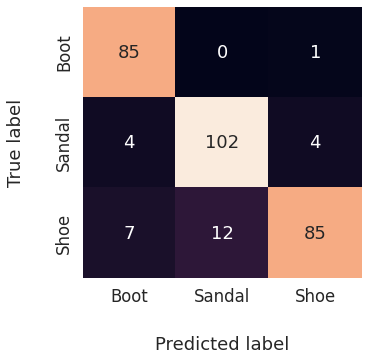

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False,fmt=".0f",
                     xticklabels=class_names,
                     yticklabels=class_names
                     )
    plt.xlabel("Predicted label",labelpad=30)
    plt.ylabel("True label",labelpad=30)
    
    
plot_conf_mat(test_label_encoder, y_preds)

In [ ]:
print(f"Precision : {precision_score(test_label_encoder,y_preds,average=None)}")
print(f"Recall : {recall_score(test_label_encoder,y_preds,average=None)}")
print(f"Accuracy : {accuracy_score(test_label_encoder,y_preds,)}")
print(f"F1-score: {f1_score(test_label_encoder,y_preds,average=None)}")

Precision : [0.88541667 0.89473684 0.94444444]
Recall : [0.98837209 0.92727273 0.81730769]
Accuracy : 0.9066666666666666
F1-score: [0.93406593 0.91071429 0.87628866]
